In [15]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (9, 6)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

In [2]:
WINDOW_SIZE = 60
STEP = 15
MIN_DURA = 15

In [3]:
df_test = load_and_preprocess_agg_metrics("../Mesures/test", window_size = WINDOW_SIZE, step = STEP, min_duration = MIN_DURA )

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.47it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:02<00:00, 10.44it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.55it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 704.06it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 28.42it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 693.61it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


  0%|                                                                                          | 0/765 [00:00<?, ?it/s]

Splitting the data in windows...


  0%|                                                                                        | 0/10053 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████| 10053/10053 [04:23<00:00, 38.20it/s]


In [4]:
df_train = load_and_preprocess_agg_metrics("../Mesures/train", window_size = WINDOW_SIZE, step = STEP)

Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 166.34it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 53.22it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 116.58it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 16.69it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.42it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.41it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.68it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 588.14it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.46it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 49.02it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.67it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 59.04it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 39.43it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.66it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.98it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:02<00:00, 726.72it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 852.61it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 856.68it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 133.07it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.93it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 95.51it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 138.50it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 340.23it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 528.13it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 337.81it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 780.07it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 767.16it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


  0%|                                                                                           | 0/94 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 810.39it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 733.93it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 533.73it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 569.46it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 499.84it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 391.89it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 342.00it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 269.11it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


  0%|                                                                                         | 0/5593 [00:00<?, ?it/s]

Splitting the data in windows...


  0%|                                                                                        | 0/23657 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████| 23657/23657 [13:08<00:00, 30.00it/s]


In [5]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

id
20221124_151137_4_0       messenger
20221124_151137_4_15      messenger
20221124_151137_4_30      messenger
20221124_151137_4_45      messenger
20221124_151137_4_60      messenger
                            ...    
20230117_121925_262_45      youtube
20230117_121925_263_0       youtube
20230117_121925_263_15      youtube
20230117_121925_263_30      youtube
20230117_121925_263_45      youtube
Name: label, Length: 10053, dtype: object


,reg_lin_R2_TBS_1,reg_lin_coef_A_TBS_1,reg_lin_R2_TBS_2,reg_lin_coef_A_TBS_2,p0_TBS_1,p10_TBS_1,p25_TBS_1,p50_TBS_1,p75_TBS_1,p90_TBS_1,...,p0_TBS_2,p10_TBS_2,p25_TBS_2,p50_TBS_2,p75_TBS_2,p90_TBS_2,p100_TBS_2,mean_TBS_2,std_TBS_2,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.560050,-1.812626,-1.283716,0.078312,0.950764,0.019189,-0.598191,-0.793162,-1.318202,-1.700821,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,0.551143,0.051724,2.484473,messenger
20221117_125310_4_15,-1.695143,-1.848090,0.848813,-0.494964,1.355171,0.019189,-0.598191,-0.819306,-1.328732,-1.850915,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,-0.703809,-0.032369,-0.627559,messenger
20221117_125310_4_30,-5.191894,-1.742466,-0.766425,0.156676,1.355171,0.019189,-0.598191,-0.772248,-1.276081,-0.981053,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,0.551143,0.005889,1.471505,messenger
20221117_125310_4_45,-1.577267,-0.958526,-1.220773,0.101800,1.355171,0.019189,-0.598191,-0.688590,-0.728518,-0.520538,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,0.551143,-0.014928,0.789716,messenger
20221117_125310_4_60,-0.033354,-0.528633,-2.099111,-0.236088,1.355171,0.019189,-0.598191,-0.688590,-0.728518,-0.452313,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,0.551143,-0.021354,0.498734,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_135,-0.924432,-1.342846,0.848813,-0.494964,0.141951,0.019189,-0.598191,-0.840220,-1.318202,-0.123983,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,-0.703809,-0.032369,-0.627559,youtube
20230124_124323_161_150,-1.867045,-1.444788,0.848813,-0.494964,0.141951,0.019189,-0.598191,-0.840220,-1.318202,-0.123983,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,-0.703809,-0.032369,-0.627559,youtube
20230124_124323_166_0,-0.050417,-1.282857,0.848813,-0.494964,-1.071268,0.019189,-0.598191,-0.667675,-1.233961,-1.288063,...,-0.021748,-0.023254,-0.023254,-0.023806,-0.023806,-0.024347,-0.703809,-0.032369,-0.627559,youtube


In [6]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [7]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 3.1543077 s for a dataset length of 23474


In [8]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.116053 s for a dataset length of 10044
Testing Duration per data : 0.011554460374352846 ms


normalized confusion matrix


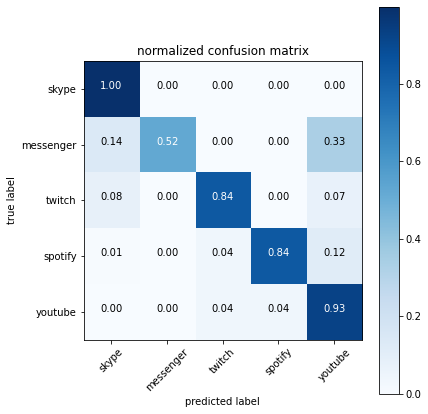

In [9]:
plot_confusion_matrix(true_labels,preds_labels)

In [10]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.8254585090929769,
 'Precision': 0.8716360344716674,
 'Recall': 0.6464555953803266,
 'F1_Score': 0.6825246730627639,
 'support': None}

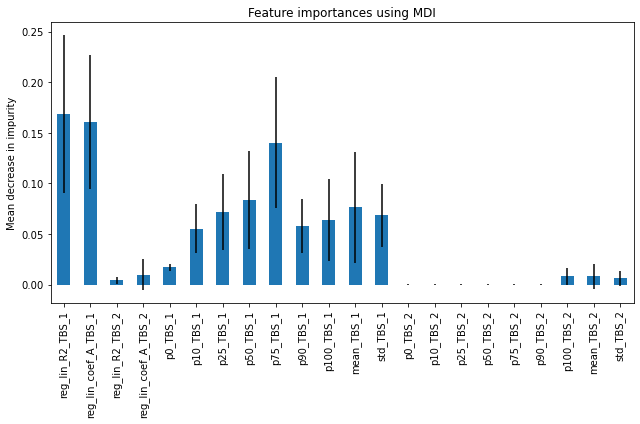

In [16]:

    
plot_feature_importance(model, training_data.columns[:-1])